# Superficie de Volatilidad

In [25]:
import QuantLib as ql

### Primero obtengo un panel de opciones para un ticker dado

In [26]:
import yfinance as yf
import datetime
ticker = 'AAPL'
data = yf.Ticker(ticker)

vencimientos = data.options
#Recorro el primer vencimiento disponible y tomo calls por un lado y puts por otro
calls = data.option_chain(vencimientos[0])[0]
puts = data.option_chain(vencimientos[0])[1]

#Recorro cada vencimiento disponible y voy tomando calls por un lado y puts por otro
for vencimiento in vencimientos[1:]:
    calls = calls.append(data.option_chain(vencimiento)[0])
    puts = puts.append(data.option_chain(vencimiento)[1])

#Uno los puts y los calls
panel_opciones = calls.append(puts)
panel_opciones.reset_index(drop=True, inplace=True)

In [27]:
panel_opciones.head(20)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL201009C00060000,2020-10-06 19:14:47,60.0,53.75,53.90,54.00,-2.650002,-4.698584,246.0,148.0,3.982422,True,REGULAR,USD
1,AAPL201009C00065000,2020-10-06 17:47:24,65.0,49.85,48.75,48.85,0.949997,1.942734,118.0,38.0,3.417970,True,REGULAR,USD
2,AAPL201009C00070000,2020-10-06 19:22:12,70.0,43.55,43.90,44.00,-1.850002,-4.074895,287.0,38.0,3.151369,True,REGULAR,USD
3,AAPL201009C00075000,2020-10-02 19:36:23,75.0,38.87,38.70,38.80,0.000000,0.000000,75.0,115.0,2.625003,True,REGULAR,USD
4,AAPL201009C00080000,2020-10-02 19:28:18,80.0,33.47,33.40,33.90,0.000000,0.000000,76.0,158.0,2.208989,True,REGULAR,USD
5,AAPL201009C00085000,2020-10-06 19:31:16,85.0,28.80,28.65,28.80,-2.600000,-8.280256,39.0,299.0,1.940430,True,REGULAR,USD
6,AAPL201009C00090000,2020-10-06 19:33:49,90.0,23.90,23.85,23.95,-1.700001,-6.640628,38.0,1008.0,1.725587,True,REGULAR,USD
7,AAPL201009C00093000,2020-10-06 17:24:15,93.0,22.35,20.85,21.00,0.400000,1.822322,46.0,22.0,1.547854,True,REGULAR,USD
8,AAPL201009C00094000,2020-10-06 18:40:37,94.0,21.65,19.85,20.00,-0.350000,-1.590911,68.0,3.0,1.484378,True,REGULAR,USD
9,AAPL201009C00095000,2020-10-06 19:16:31,95.0,18.85,18.70,18.80,-2.500000,-11.709601,117.0,547.0,1.337894,True,REGULAR,USD


In [28]:
# Le agrego dos columnas utiles - Ticker y Spot

panel_opciones['Spot'] = (data.info['bid']+data.info['ask'])/2
#panel_opciones['Spot'] = data.info['close']

panel_opciones['Ticker'] = ticker



if data.info['dividendYield']==None:
    panel_opciones['dividendYield'] = 0.0
else:
    panel_opciones['dividendYield'] = data.info['dividendYield']
panel_opciones['Moneyness'] = 0
panel_opciones['TTM'] = 0
panel_opciones['CallPut'] = ''
panel_opciones['PrecioOpcion'] = 0.0
panel_opciones['Tasa'] = 0.0
#Modificacion
len_tick = len(ticker)

for idx in list(panel_opciones.index.values):

    year = 2000 + int(panel_opciones.contractSymbol.values[idx][len_tick:len_tick+2])
    month = int(panel_opciones.contractSymbol.values[idx][len_tick+2:len_tick+4])
    day = int(panel_opciones.contractSymbol.values[idx][len_tick+4:len_tick+6])
    callput = panel_opciones.contractSymbol.values[idx][len_tick+6:len_tick+7]
        
    hoy = datetime.date.today()
    expiry_datetime = datetime.date(year, month, day)
    ttm = (expiry_datetime - hoy).days

    
    
    panel_opciones['TTM'].values[idx] = ttm
    panel_opciones['CallPut'].values[idx] = callput
               
    
    
panel_opciones.PrecioOpcion = (panel_opciones.bid + panel_opciones.bid)/2
panel_opciones.Moneyness = panel_opciones.Spot/ panel_opciones.strike



In [29]:
panel_opciones.head(20)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,contractSize,currency,Spot,Ticker,dividendYield,Moneyness,TTM,CallPut,PrecioOpcion,Tasa
0,AAPL201009C00060000,2020-10-06 19:14:47,60.0,53.75,53.90,54.00,-2.650002,-4.698584,246.0,148.0,...,REGULAR,USD,113.64,AAPL,0.007,1.894000,3,C,53.90,0.0
1,AAPL201009C00065000,2020-10-06 17:47:24,65.0,49.85,48.75,48.85,0.949997,1.942734,118.0,38.0,...,REGULAR,USD,113.64,AAPL,0.007,1.748308,3,C,48.75,0.0
2,AAPL201009C00070000,2020-10-06 19:22:12,70.0,43.55,43.90,44.00,-1.850002,-4.074895,287.0,38.0,...,REGULAR,USD,113.64,AAPL,0.007,1.623429,3,C,43.90,0.0
3,AAPL201009C00075000,2020-10-02 19:36:23,75.0,38.87,38.70,38.80,0.000000,0.000000,75.0,115.0,...,REGULAR,USD,113.64,AAPL,0.007,1.515200,3,C,38.70,0.0
4,AAPL201009C00080000,2020-10-02 19:28:18,80.0,33.47,33.40,33.90,0.000000,0.000000,76.0,158.0,...,REGULAR,USD,113.64,AAPL,0.007,1.420500,3,C,33.40,0.0
5,AAPL201009C00085000,2020-10-06 19:31:16,85.0,28.80,28.65,28.80,-2.600000,-8.280256,39.0,299.0,...,REGULAR,USD,113.64,AAPL,0.007,1.336941,3,C,28.65,0.0
6,AAPL201009C00090000,2020-10-06 19:33:49,90.0,23.90,23.85,23.95,-1.700001,-6.640628,38.0,1008.0,...,REGULAR,USD,113.64,AAPL,0.007,1.262667,3,C,23.85,0.0
7,AAPL201009C00093000,2020-10-06 17:24:15,93.0,22.35,20.85,21.00,0.400000,1.822322,46.0,22.0,...,REGULAR,USD,113.64,AAPL,0.007,1.221935,3,C,20.85,0.0
8,AAPL201009C00094000,2020-10-06 18:40:37,94.0,21.65,19.85,20.00,-0.350000,-1.590911,68.0,3.0,...,REGULAR,USD,113.64,AAPL,0.007,1.208936,3,C,19.85,0.0
9,AAPL201009C00095000,2020-10-06 19:16:31,95.0,18.85,18.70,18.80,-2.500000,-11.709601,117.0,547.0,...,REGULAR,USD,113.64,AAPL,0.007,1.196211,3,C,18.70,0.0


### Ahora, con el panel de opciones armo e lframework de QuantLib

In [30]:
panel_opciones['ImpliedVolatility_QuantLib'] = 0.0
panel_opciones['FechaExpiracion'] = ql.Date(1,1,2020)
panel_opciones['Delta'] = 0.0
panel_opciones['Vega'] = 0.0

Inpputs comunes a todas las opciones

In [31]:
precio_activo = panel_opciones['Spot'][0] #Spot (S)
volatilidad = 0.2   #NO es importante, pero si se necesita una para setear el modelo
tasa_dividendos =   panel_opciones['dividendYield'][0] #tasa de dividendos anualizada (q)

tasa_interes = 0.0013 #tasa libre de riesgo anualizada (r) #Podria cambiar! es una primera aproximacion

#Valuacion hoy
fecha_valuacion = ql.Date.todaysDate()
ql.Settings.instance().evaluationDate = fecha_valuacion
day_count = ql.Actual365Fixed()
calendario = ql.UnitedStates()


#Objetos QuantLib
S = ql.SimpleQuote(precio_activo)
objeto_spot = ql.QuoteHandle(S)

r = ql.SimpleQuote(tasa_interes)
objeto_tasa_interes = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                            ql.QuoteHandle(r), 
                                                        day_count))
q = ql.SimpleQuote(tasa_dividendos)
objeto_tasa_dividendos = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                      ql.QuoteHandle(q), 
                                                      day_count))

sigma = ql.SimpleQuote(volatilidad)
objeto_volatilidad = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(fecha_valuacion, 
                                                                 calendario, 
                                                                 ql.QuoteHandle(sigma), 
                                                             day_count))

proceso_BSM = ql.BlackScholesMertonProcess(objeto_spot, 
                                           objeto_tasa_dividendos, 
                                           objeto_tasa_interes, 
                                           objeto_volatilidad)
modelo_arbol = 'CRR'
pasos_arbol = 1000


In [32]:
#Armo curva de tasas
import numpy as np

Dias = np.array([1, 7, 30, 60, 91, 182, 365])

Tasas = np.array([0.0008175,#1D
                 0.0011363, #1W
                 0.0015638, #1M
                 0.0018800, #2M
                 0.0025588, #3M
                 0.0030725, #6M
                 0.0044588]) #1Y

#curva = np.vstack((Dias, Tasas)).T

from scipy import interpolate
curva_interp = interpolate.interp1d(Dias, Tasas, fill_value='extrapolate')


Dias2 = np.array([7, 17, 52, 80, 108, 144, 172, 199, 290, 381, 472, 563, 654, 752])
Tasas2 = np.array([0.00109752,
                   0.00130237,
                   0.00199518,
                   0.00214845,
                   0.00228795,
                   0.00245093,
                   0.00248103,
                   0.00248141,
                   0.0023548,
                   0.00225237,
                   0.0021992,
                   0.00220417,
                   0.0021866,
                   0.00218564])
#curva2 = np.vstack((Dias2, Tasas2)).T
curva_interp2 = interpolate.interp1d(Dias2, Tasas2, fill_value='extrapolate')



In [33]:
for idx in list(panel_opciones.index):
    
    #Definimos los inputs
    precio_ejercicio = panel_opciones['strike'].values[idx] #Strike (K)
    #Expiracion el 16 de octubre de 2020
    fecha_expiracion = fecha_valuacion + panel_opciones['TTM'].values[idx]
    panel_opciones['FechaExpiracion'].values[idx] = fecha_expiracion
    if panel_opciones['CallPut'].values[idx]=='C':
        tipo_opcion = ql.Option.Call
    elif  panel_opciones['CallPut'].values[idx]=='P':
        tipo_opcion = ql.Option.Put 
    panel_opciones['Tasa'].values[idx] = curva_interp(panel_opciones.TTM.values[idx])
   #panel_opciones['Tasa'].values[idx] = curva_interp2(panel_opciones.TTM.values[idx])
    
    r.setValue(panel_opciones['Tasa'].values[idx])
    
    payoff = ql.PlainVanillaPayoff(tipo_opcion, precio_ejercicio)
    ejercicio_americano = ql.AmericanExercise(fecha_valuacion, fecha_expiracion)
    opcion_americana = ql.VanillaOption(payoff, ejercicio_americano)

    precio_mercado = panel_opciones['PrecioOpcion'].values[idx]
    
    try:
        volatilidad_implicita = opcion_americana.impliedVolatility(precio_mercado, proceso_BSM)
        panel_opciones['ImpliedVolatility_QuantLib'].values[idx] = volatilidad_implicita  
        
        sigma0 = panel_opciones['ImpliedVolatility_QuantLib'].values[idx]
        sigma.setValue(sigma0)
        opcion_americana.setPricingEngine(ql.BinomialVanillaEngine(proceso_BSM, 
                                                           modelo_arbol, 
                                                           pasos_arbol))
        
        panel_opciones['Delta'].values[idx] = opcion_americana.delta()
        
        V0 = opcion_americana.NPV()
        h = 0.0001
        sigma.setValue(sigma0+h) 
        V_plus = opcion_americana.NPV()

        panel_opciones['Vega'].values[idx] = (V_plus - V0)/h 

        
        
    except:
        panel_opciones['ImpliedVolatility_QuantLib'].values[idx] = 0.0
        panel_opciones['Delta'].values[idx] = 0.0
        panel_opciones['Vega'].values[idx] = 0.0
    
            
    



In [34]:
panel_opciones.head(20)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,dividendYield,Moneyness,TTM,CallPut,PrecioOpcion,Tasa,ImpliedVolatility_QuantLib,FechaExpiracion,Delta,Vega
0,AAPL201009C00060000,2020-10-06 19:14:47,60.0,53.75,53.90,54.00,-2.650002,-4.698584,246.0,148.0,...,0.007,1.894000,3,C,53.90,0.000924,3.508515,"October 9th, 2020",0.984907,0.404028
1,AAPL201009C00065000,2020-10-06 17:47:24,65.0,49.85,48.75,48.85,0.949997,1.942734,118.0,38.0,...,0.007,1.748308,3,C,48.75,0.000924,2.679930,"October 9th, 2020",0.992301,0.213056
2,AAPL201009C00070000,2020-10-06 19:22:12,70.0,43.55,43.90,44.00,-1.850002,-4.074895,287.0,38.0,...,0.007,1.623429,3,C,43.90,0.000924,2.774278,"October 9th, 2020",0.979951,0.496686
3,AAPL201009C00075000,2020-10-02 19:36:23,75.0,38.87,38.70,38.80,0.000000,0.000000,75.0,115.0,...,0.007,1.515200,3,C,38.70,0.000924,1.882324,"October 9th, 2020",0.994217,0.168763
4,AAPL201009C00080000,2020-10-02 19:28:18,80.0,33.47,33.40,33.90,0.000000,0.000000,76.0,158.0,...,0.007,1.420500,3,C,33.40,0.000924,0.000000,"October 9th, 2020",0.000000,0.000000
5,AAPL201009C00085000,2020-10-06 19:31:16,85.0,28.80,28.65,28.80,-2.600000,-8.280256,39.0,299.0,...,0.007,1.336941,3,C,28.65,0.000924,0.893827,"October 9th, 2020",1.000000,0.000000
6,AAPL201009C00090000,2020-10-06 19:33:49,90.0,23.90,23.85,23.95,-1.700001,-6.640628,38.0,1008.0,...,0.007,1.262667,3,C,23.85,0.000924,1.447109,"October 9th, 2020",0.967445,0.717590
7,AAPL201009C00093000,2020-10-06 17:24:15,93.0,22.35,20.85,21.00,0.400000,1.822322,46.0,22.0,...,0.007,1.221935,3,C,20.85,0.000924,1.278120,"October 9th, 2020",0.963146,0.816368
8,AAPL201009C00094000,2020-10-06 18:40:37,94.0,21.65,19.85,20.00,-0.350000,-1.590911,68.0,3.0,...,0.007,1.208936,3,C,19.85,0.000924,1.222252,"October 9th, 2020",0.961549,0.821018
9,AAPL201009C00095000,2020-10-06 19:16:31,95.0,18.85,18.70,18.80,-2.500000,-11.709601,117.0,547.0,...,0.007,1.196211,3,C,18.70,0.000924,0.933922,"October 9th, 2020",0.984693,0.393819


In [35]:
panel_limpio = panel_opciones[['contractSymbol','CallPut','FechaExpiracion','strike','TTM','PrecioOpcion','impliedVolatility','ImpliedVolatility_QuantLib','Delta', 'Vega']]

#panel_limpio = panel_limpio[panel_limpio.ImpliedVolatility_QuantLib>0.0001]
#panel_limpio = panel_limpio[panel_limpio.impliedVolatility>0.0001]

panel_limpio = panel_limpio[panel_limpio.Vega>0.0001]

#panel_limpio = panel_limpio[panel_limpio.CallPut=='C']

#panel_limpio = panel_limpio[panel_limpio.strike>=10.0]
#panel_limpio = panel_limpio[panel_limpio.strike<=20.0]

panel_limpio.head(20)

,contractSymbol,CallPut,FechaExpiracion,strike,TTM,PrecioOpcion,impliedVolatility,ImpliedVolatility_QuantLib,Delta,Vega
0,AAPL201009C00060000,C,"October 9th, 2020",60.00,3,53.90,3.982422,3.508515,0.984907,0.404028
1,AAPL201009C00065000,C,"October 9th, 2020",65.00,3,48.75,3.417970,2.679930,0.992301,0.213056
2,AAPL201009C00070000,C,"October 9th, 2020",70.00,3,43.90,3.151369,2.774278,0.979951,0.496686
3,AAPL201009C00075000,C,"October 9th, 2020",75.00,3,38.70,2.625003,1.882324,0.994217,0.168763
6,AAPL201009C00090000,C,"October 9th, 2020",90.00,3,23.85,1.725587,1.447109,0.967445,0.717590
7,AAPL201009C00093000,C,"October 9th, 2020",93.00,3,20.85,1.547854,1.278120,0.963146,0.816368
8,AAPL201009C00094000,C,"October 9th, 2020",94.00,3,19.85,1.484378,1.222252,0.961549,0.821018
9,AAPL201009C00095000,C,"October 9th, 2020",95.00,3,18.70,1.337894,0.933922,0.984693,0.393819
10,AAPL201009C00096000,C,"October 9th, 2020",96.00,3,17.70,1.277347,0.888017,0.983816,0.396240
11,AAPL201009C00097000,C,"October 9th, 2020",97.00,3,16.65,1.205082,0.646393,0.997181,0.091184


In [36]:
#Seteo de Matplotlib
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12, 8]

plt.rcParams['figure.dpi'] = 100

Vamos a usar los datos de mercado recien trabajados para obtener la superficie de volatilidad.
En primer lugar me quedo con el sector en el cual hay datos densos - me saco de encima strikes y expiraciones que no tengan datos de volatilidad implicita.

Primero generlo las listas de strikes y de expiraciones del dataframe.

In [37]:
strikes = list(set(panel_limpio['strike'].values))
strikes = sorted(strikes)
print(strikes)
expiraciones_ql = list(set(panel_limpio['FechaExpiracion'].values))
TTMs = list(set(panel_limpio['TTM'].values))
print(expiraciones_ql)


[18.75, 20.0, 21.25, 22.5, 23.75, 25.0, 26.25, 27.5, 28.75, 30.0, 31.25, 32.5, 33.75, 35.0, 36.25, 37.5, 38.75, 40.0, 41.25, 42.5, 43.75, 45.0, 46.25, 47.5, 48.75, 50.0, 51.25, 52.5, 53.75, 55.0, 56.25, 57.5, 58.75, 60.0, 61.25, 62.5, 63.75, 65.0, 66.25, 67.5, 68.75, 70.0, 71.25, 72.5, 73.75, 75.0, 76.25, 77.5, 78.75, 80.0, 81.25, 82.5, 83.75, 85.0, 86.25, 87.5, 88.75, 90.0, 91.25, 92.5, 93.0, 93.75, 94.0, 95.0, 96.0, 96.25, 97.0, 97.5, 98.0, 98.5, 98.75, 99.0, 99.5, 100.0, 101.0, 101.25, 102.0, 102.5, 103.0, 103.75, 104.0, 105.0, 106.0, 106.25, 107.0, 107.5, 108.0, 108.75, 109.0, 110.0, 111.0, 111.25, 112.0, 112.5, 113.0, 113.75, 114.0, 115.0, 116.0, 116.25, 117.0, 117.5, 118.0, 118.75, 119.0, 120.0, 121.0, 121.25, 122.0, 122.5, 123.0, 123.75, 124.0, 125.0, 126.0, 126.25, 127.0, 127.5, 128.0, 128.75, 129.0, 130.0, 131.0, 131.25, 132.0, 132.5, 133.0, 133.75, 134.0, 135.0, 136.0, 136.25, 137.0, 137.5, 138.0, 138.75, 139.0, 140.0, 141.0, 141.25, 142.0, 142.5, 143.0, 143.75, 144.0, 145.0,

Las fechas estan en formato QuantLib, para ordenarlas las paso a datetime y las vuelvo a convertir a Dates de QuantLib

In [38]:
expiraciones_dt = sorted([date_QL.to_date() for date_QL in expiraciones_ql])
TTMs = sorted(TTMs)
expiraciones_dt = expiraciones_dt
expiraciones_ql=[]
for exp_dt in expiraciones_dt:
    expiraciones_ql.append(ql.Date(exp_dt.day, exp_dt.month, exp_dt.year))
print(expiraciones_ql)

[Date(9,10,2020), Date(16,10,2020), Date(23,10,2020), Date(30,10,2020), Date(6,11,2020), Date(13,11,2020), Date(20,11,2020), Date(18,12,2020), Date(15,1,2021), Date(19,3,2021), Date(16,4,2021), Date(18,6,2021), Date(17,9,2021), Date(21,1,2022), Date(17,6,2022), Date(16,9,2022), Date(20,1,2023)]


Genero ahora una matriz de numpy con las volatilidades implicitas

In [49]:
implied_vols_np = np.zeros(shape = (len(strikes), len(expiraciones_ql)))
implied_vols_ql = ql.Matrix(len(strikes), len(expiraciones_ql))
for i in range(implied_vols_ql.rows()):
    for j in range(1,implied_vols_ql.columns()):
        try:
            #implied_vols_np[i][j] = panel_limpio[(panel_limpio.strike==strikes[i]) & (panel_limpio.FechaExpiracion==expiraciones_ql[j])].impliedVolatility.values[0]
            implied_vols_np[i][j] = panel_limpio[(panel_limpio.strike==strikes[i]) & (panel_limpio.FechaExpiracion==expiraciones_ql[j])].ImpliedVolatility_QuantLib.values[0]
        except:
            implied_vols_np[i][j] = 'Nan'
           
print(implied_vols_np)


[[0.                nan        nan ...        nan        nan        nan]
 [0.                nan        nan ...        nan        nan        nan]
 [0.                nan        nan ...        nan        nan        nan]
 ...
 [0.                nan        nan ...        nan        nan        nan]
 [0.                nan        nan ...        nan 1.34782374        nan]
 [0.                nan        nan ... 1.26542552 1.28096831        nan]]


Ahora es donde hago la limpieza del dataframe. Interpolo y limpio los Nan

In [50]:
import pandas as pd
df = pd.DataFrame(implied_vols_np, 
                  index = strikes, 
                  columns = expiraciones_ql)
df = df[df>0.00010]

#INTERPOLATE!
#df = df.interpolate(method='linear', axis=1)
#df = df.interpolate(method='linear', axis=0)


df = df.drop([df.columns[0]] ,  axis='columns')
TTMs_ql=TTMs[1:]
df = df.dropna()
print(len(TTMs_ql))
df

16


,"October 16th, 2020","October 23rd, 2020","October 30th, 2020","November 6th, 2020","November 13th, 2020","November 20th, 2020","December 18th, 2020","January 15th, 2021","March 19th, 2021","April 16th, 2021","June 18th, 2021","September 17th, 2021","January 21st, 2022","June 17th, 2022","September 16th, 2022","January 20th, 2023"
75.0,1.068153,0.911589,0.726011,0.641887,0.647820,0.547713,0.587685,0.566651,0.512465,0.479332,0.454012,0.441055,0.426336,0.412630,0.399033,0.392059
80.0,0.745631,0.731182,0.675164,0.636295,0.445497,0.587555,0.547187,0.524917,0.490811,0.480355,0.467083,0.433232,0.416324,0.408538,0.398491,0.409771
85.0,0.649831,0.606320,0.574435,0.631782,0.527328,0.584021,0.511927,0.501520,0.464703,0.467925,0.442680,0.432692,0.415990,0.401187,0.394481,0.398449
90.0,0.617016,0.438970,0.527403,0.484689,0.548939,0.532952,0.506049,0.474320,0.457745,0.462392,0.442232,0.424612,0.412362,0.397998,0.394012,0.384190
95.0,0.439252,0.477368,0.486272,0.490698,0.490179,0.534147,0.470475,0.467463,0.465570,0.452771,0.437797,0.423514,0.413313,0.401226,0.392640,0.388688
100.0,0.516258,0.468737,0.521319,0.559503,0.501245,0.523161,0.477515,0.467527,0.455776,0.448708,0.434894,0.417430,0.409204,0.397259,0.389792,0.392279
105.0,0.477961,0.491231,0.498883,0.522946,0.501275,0.494134,0.467954,0.471028,0.452458,0.450223,0.436066,0.414651,0.405252,0.395671,0.391823,0.400126
110.0,0.502430,0.474650,0.513894,0.523917,0.512815,0.507544,0.463463,0.462017,0.449145,0.444004,0.427245,0.417198,0.406594,0.394507,0.389134,0.397168
115.0,0.471130,0.468652,0.493958,0.514534,0.509560,0.490593,0.462660,0.459184,0.446050,0.440342,0.428274,0.416780,0.403986,0.392974,0.387223,0.393716
120.0,0.461124,0.456070,0.490155,0.507659,0.497911,0.493470,0.456219,0.447827,0.446847,0.434775,0.425644,0.411606,0.404778,0.393063,0.387759,0.392809


In [51]:
strikes_new = df.index.values.tolist()
expiraciones_new = df.columns.tolist()
df_np = df.to_numpy()

df_np


array([[1.06815271, 0.9115889 , 0.72601058, 0.64188697, 0.64782001,
        0.54771322, 0.58768517, 0.56665089, 0.51246453, 0.47933199,
        0.45401183, 0.44105468, 0.42633561, 0.41262989, 0.39903267,
        0.39205934],
       [0.74563111, 0.7311821 , 0.67516357, 0.63629466, 0.44549714,
        0.5875549 , 0.54718676, 0.52491709, 0.49081146, 0.480355  ,
        0.46708292, 0.43323194, 0.41632398, 0.40853791, 0.39849144,
        0.4097708 ],
       [0.64983052, 0.60632013, 0.57443466, 0.63178228, 0.52732781,
        0.58402108, 0.51192736, 0.50152028, 0.4647034 , 0.46792507,
        0.44268044, 0.43269227, 0.41599038, 0.40118651, 0.3944812 ,
        0.39844879],
       [0.61701638, 0.43897006, 0.52740269, 0.48468937, 0.54893904,
        0.53295212, 0.50604944, 0.47431958, 0.45774545, 0.46239188,
        0.44223238, 0.42461178, 0.41236231, 0.3979975 , 0.39401163,
        0.38418971],
       [0.43925196, 0.4773679 , 0.48627177, 0.49069759, 0.49017869,
        0.53414749, 0.47047499, 

In [52]:
from mpl_toolkits import mplot3d

X, Y = np.meshgrid(TTMs_ql,strikes_new)
#Z = df_np.transpose()
Z = df_np


print('X', np.shape(X))
print('Y', np.shape(Y))
print('Z', np.shape(Z))

X (17, 16)
Y (17, 16)
Z (17, 16)


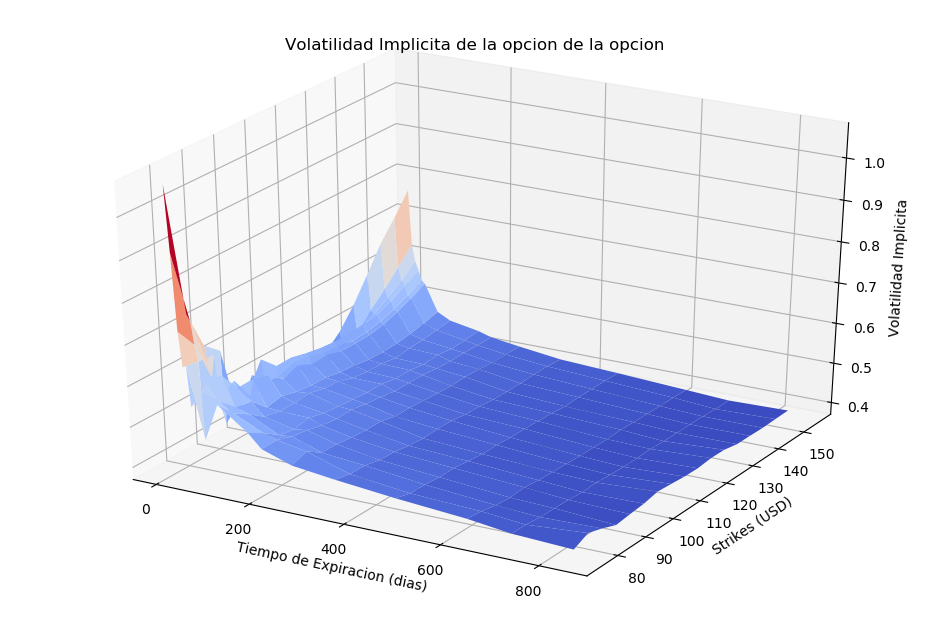

In [53]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')#rstride=1, cstride=1)
                

ax.set_title('Volatilidad Implicita de la opcion de la opcion');
ax.set_xlabel('Tiempo de Expiracion (dias)')
ax.set_ylabel('Strikes (USD)')
ax.set_zlabel('Volatilidad Implicita')

plt.show()

In [54]:
implied_vols_ql = ql.Matrix(len(strikes_new), len(expiraciones_new))

for i in range(implied_vols_ql.rows()):
    for j in range(implied_vols_ql.columns()):
        implied_vols_ql[i][j] = df_np[i][j]
        
        
print(implied_vols_ql)
        


| 1.06815 0.911589 0.726011 0.641887 0.64782 0.547713 0.587685 0.566651 0.512465 0.479332 0.454012 0.441055 0.426336 0.41263 0.399033 0.392059 |
| 0.745631 0.731182 0.675164 0.636295 0.445497 0.587555 0.547187 0.524917 0.490811 0.480355 0.467083 0.433232 0.416324 0.408538 0.398491 0.409771 |
| 0.649831 0.60632 0.574435 0.631782 0.527328 0.584021 0.511927 0.50152 0.464703 0.467925 0.44268 0.432692 0.41599 0.401187 0.394481 0.398449 |
| 0.617016 0.43897 0.527403 0.484689 0.548939 0.532952 0.506049 0.47432 0.457745 0.462392 0.442232 0.424612 0.412362 0.397998 0.394012 0.38419 |
| 0.439252 0.477368 0.486272 0.490698 0.490179 0.534147 0.470475 0.467463 0.46557 0.452771 0.437797 0.423514 0.413313 0.401226 0.39264 0.388688 |
| 0.516258 0.468737 0.521319 0.559503 0.501245 0.523161 0.477515 0.467527 0.455776 0.448708 0.434894 0.41743 0.409204 0.397259 0.389792 0.392279 |
| 0.477961 0.491231 0.498883 0.522946 0.501275 0.494134 0.467954 0.471028 0.452458 0.450223 0.436066 0.414651 0.405252 0.3956

In [55]:
calendar = ql.UnitedStates()

black_var_surface = ql.BlackVarianceSurface(fecha_valuacion, calendar, 
                                            expiraciones_new, strikes_new, 
                                            implied_vols_ql, day_count)

#ahora elijo un strike y un expiry cualesqueira
strike = (min(strikes_new) + max(strikes_new))/2
expiry = 1 # years
black_var_surface.blackVol(expiry, strike)

0.4143157648383358

In [56]:
strikes_smooth = np.linspace(min(strikes_new), max(strikes_new), 400)
TTMs_smooth = np.linspace(1, 200, 200)
implied_vols_ql_smooth = ql.Matrix(len(strikes_smooth), len(TTMs_smooth))
implied_vols_np_smooth = np.zeros(shape = (len(strikes_smooth), len(TTMs_smooth)))
for i in range(implied_vols_ql_smooth.rows()):
    for j in range(implied_vols_ql_smooth.columns()):
        expiry = TTMs_smooth[j]/365.0
        implied_vols_np_smooth[i][j] = black_var_surface.blackVol(expiry, strikes_smooth[i])

#implied_vols_np_smooth

In [57]:


Y, X = np.meshgrid(TTMs_smooth, strikes_smooth)
Z = implied_vols_np_smooth


print('X', np.shape(X))
print('Y', np.shape(Y))
print('Z', np.shape(Z))

X (400, 200)
Y (400, 200)
Z (400, 200)


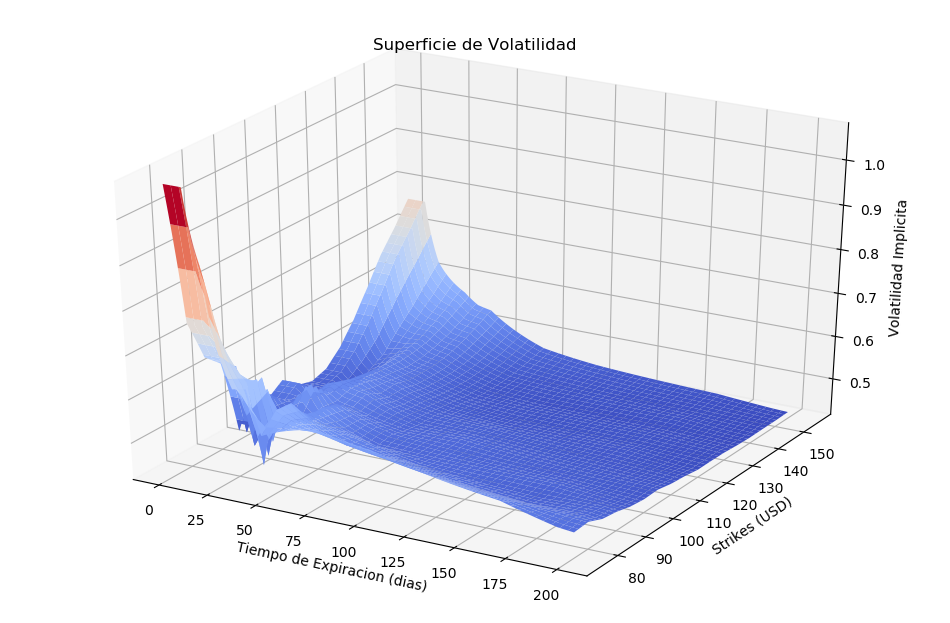

In [58]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(Y, X, Z, cmap='coolwarm')#, edgecolor='none')#rstride=1, cstride=1,
                

ax.set_title('Superficie de Volatilidad');
ax.set_xlabel('Tiempo de Expiracion (dias)')
ax.set_ylabel('Strikes (USD)')
ax.set_zlabel('Volatilidad Implicita')

plt.show()

## Otro metodo

In [59]:
std_ttm_list_days = np.array([30, 60, 91, 122, 152, 182, 273, 365, 547, 730])
    
std_delta_calls= np.arange(0.05,1.00,0.05)




        

In [60]:
vol_surf_calls = np.zeros((len(std_ttm_list_days), len(std_delta_calls)))


In [61]:
df_raw_IV_data = panel_opciones

for i_delta in range(len(std_delta_calls)):
    for j_days in range(len(std_ttm_list_days)):
        
        Days = std_ttm_list_days[j_days]
        Delta = std_delta_calls[i_delta]       
        if Delta>0:
            Type = 'C'
        else:
            Type = 'P'
        
        num = 0
        denom = 0
        dnum = 0
        h1 = 0.05
        h2 = 0.005
        h3 = 0.001
        for i in range(0, len(df_raw_IV_data.index)):
            x = np.log(df_raw_IV_data.loc[:,"TTM"].values[i]/Days)
            #Code for y and z / CALL EQUIVALENT DELTA
            if df_raw_IV_data.loc[:,"CallPut"].values[i] == 'C':
                di = df_raw_IV_data.loc[:,"Delta"].values[i]
                if Type == 'C':
                    dj = Delta
                    z = 0
                else:
                    dj = Delta+1
                    z = 1
            else:
                di = df_raw_IV_data.loc[:,"Delta"].values[i]+1
                if Type == 'C':
                    dj = Delta
                    z = 1
                else:
                    dj = Delta+1
                    z = 0
            
            y = di - dj
            
            phi =  np.exp(-x*x/(2*h1) - y*y/(2*h2) - z*z/(2*h3))
            
            num = num + df_raw_IV_data.loc[:,"Vega"].values[i] * df_raw_IV_data.loc[:,"ImpliedVolatility_QuantLib"].values[i] * phi
            dnum = dnum + df_raw_IV_data.loc[:,"Vega"].values[i] * df_raw_IV_data.loc[:,"ImpliedVolatility_QuantLib"].values[i] * df_raw_IV_data.loc[:,"ImpliedVolatility_QuantLib"].values[i] * phi
            denom = denom + df_raw_IV_data.loc[:,"Vega"].values[i] * phi
                    
        vol_surf_calls[j_days][i_delta] = (num/denom)        
                

In [62]:
vol_surf_calls

array([[0.91346481, 1.05364968, 1.12140457, 1.09609027, 1.00865864,
        0.87590889, 0.71880004, 0.59161824, 0.52941453, 0.51286543,
        0.51211929, 0.51412356, 0.51626712, 0.51882329, 0.52250371,
        0.52889533, 0.54438948, 0.57982798, 0.63624307],
       [1.28305377, 1.63268725, 1.94631463, 2.13323032, 2.17365859,
        2.05568125, 1.79114076, 1.48894206, 1.24147107, 1.00724947,
        0.76392984, 0.58559588, 0.50921812, 0.49245793, 0.50227507,
        0.55456129, 0.67871587, 0.83319221, 0.95245712],
       [1.03808239, 1.23044549, 1.41207371, 1.52991871, 1.59304899,
        1.63006711, 1.61109557, 1.54242178, 1.45588837, 1.30758483,
        1.05204071, 0.77218142, 0.6043193 , 0.54346626, 0.52288274,
        0.52634893, 0.57239126, 0.6573273 , 0.74400206],
       [0.86409177, 0.98575825, 1.10750379, 1.19059411, 1.22593048,
        1.2394019 , 1.24323189, 1.25596434, 1.30432814, 1.36183735,
        1.37387175, 1.32534857, 1.23978329, 1.13666999, 1.00542462,
        0.837

In [63]:


Y, X = np.meshgrid(std_ttm_list_days, std_delta_calls)
Z = vol_surf_calls.transpose()

print('X', np.shape(X))
print('Y', np.shape(Y))
print('Z', np.shape(Z))

X (19, 10)
Y (19, 10)
Z (19, 10)


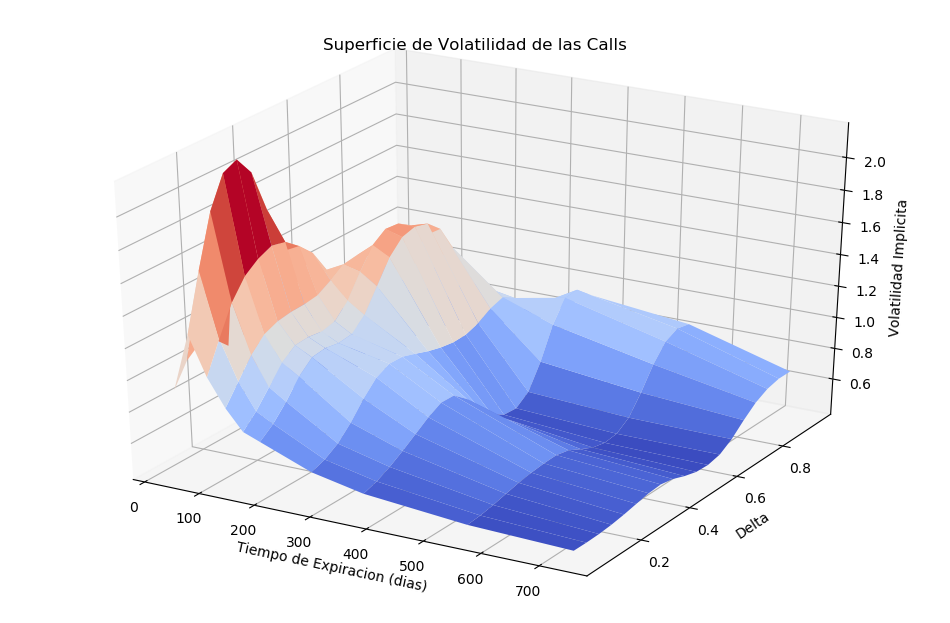

In [64]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(Y, X, Z, cmap='coolwarm')#, edgecolor='none')#rstride=1, cstride=1,
                

ax.set_title('Superficie de Volatilidad de las Calls');
ax.set_xlabel('Tiempo de Expiracion (dias)')
ax.set_ylabel('Delta')
ax.set_zlabel('Volatilidad Implicita')

plt.show()

In [65]:
std_delta_puts= np.arange(-0.95,0.00,0.05)
vol_surf_puts = np.zeros((len(std_ttm_list_days), len(std_delta_puts)))


In [66]:
df_raw_IV_data = panel_opciones

for i_delta in range(len(std_delta_puts)):
    for j_days in range(len(std_ttm_list_days)):
        
        Days = std_ttm_list_days[j_days]
        Delta = std_delta_puts[i_delta]       
        if Delta>0:
            Type = 'C'
        else:
            Type = 'P'
        
        num = 0
        denom = 0
        dnum = 0
        h1 = 0.05
        h2 = 0.005
        h3 = 0.001
        for i in range(0, len(df_raw_IV_data.index)):
            x = np.log(df_raw_IV_data.loc[:,"TTM"].values[i]/Days)
            #Code for y and z / CALL EQUIVALENT DELTA
            if df_raw_IV_data.loc[:,"CallPut"].values[i] == 'C':
                di = df_raw_IV_data.loc[:,"Delta"].values[i]
                if Type == 'C':
                    dj = Delta
                    z = 0
                else:
                    dj = Delta+1
                    z = 1
            else:
                di = df_raw_IV_data.loc[:,"Delta"].values[i]+1
                if Type == 'C':
                    dj = Delta
                    z = 1
                else:
                    dj = Delta+1
                    z = 0
            
            y = di - dj
            
            phi =  np.exp(-x*x/(2*h1) - y*y/(2*h2) - z*z/(2*h3))
            
            num = num + df_raw_IV_data.loc[:,"Vega"].values[i] * df_raw_IV_data.loc[:,"ImpliedVolatility_QuantLib"].values[i] * phi
            dnum = dnum + df_raw_IV_data.loc[:,"Vega"].values[i] * df_raw_IV_data.loc[:,"ImpliedVolatility_QuantLib"].values[i] * df_raw_IV_data.loc[:,"ImpliedVolatility_QuantLib"].values[i] * phi
            denom = denom + df_raw_IV_data.loc[:,"Vega"].values[i] * phi
                    
        vol_surf_puts[j_days][i_delta] = (num/denom)        
                

In [67]:


Y, X = np.meshgrid(std_ttm_list_days, std_delta_puts)
Z = vol_surf_puts.transpose()

print('X', np.shape(X))
print('Y', np.shape(Y))
print('Z', np.shape(Z))

X (19, 10)
Y (19, 10)
Z (19, 10)


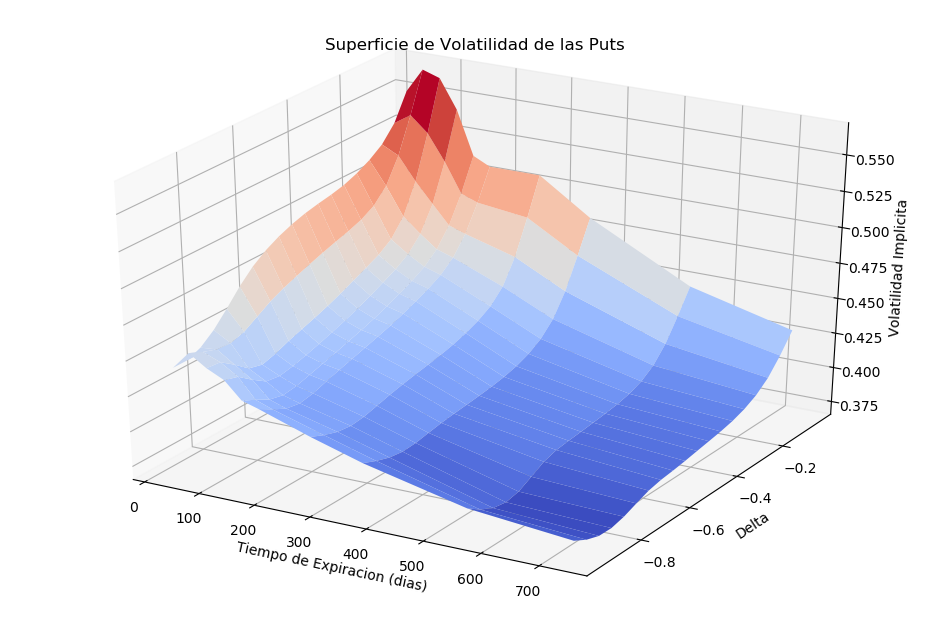

In [68]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(Y, X, Z, cmap='coolwarm')#, edgecolor='none')#rstride=1, cstride=1,
                

ax.set_title('Superficie de Volatilidad de las Puts');
ax.set_xlabel('Tiempo de Expiracion (dias)')
ax.set_ylabel('Delta')
ax.set_zlabel('Volatilidad Implicita')

plt.show()